In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import imageio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D, MaxPooling2D, Conv2D
from tensorflow.keras import applications as app
from tensorflow.keras import optimizers, losses, activations, models

#from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

### Data pre-processing

In [2]:
data_generator = ImageDataGenerator(rescale=1/255)

In [4]:
input_w = 150 
input_h = 150
batch_size_train = 11
batch_size_test = 11

In [5]:
%%time
train_generator = data_generator.flow_from_directory(
        directory='C:/breakhis/train',
        target_size=(input_w, input_h),
        batch_size=batch_size_train,
        class_mode='categorical',
        shuffle=True)

Found 5005 images belonging to 8 classes.
Wall time: 225 ms


In [6]:
test_generator = data_generator.flow_from_directory(
        directory='C:/breakhis/test',
        target_size=(input_w, input_h),
        batch_size=batch_size_test,
        class_mode='categorical',
        shuffle=True)

Found 2904 images belonging to 8 classes.


### Build Model3-2: Transfer learning (inception v3)

In [7]:
# We can change different transfer model in this line
base_incepv3_model = app.inception_v3.InceptionV3(weights=None, include_top=False, input_shape=(input_w, input_h,3), pooling = 'avg')

W0920 17:02:12.052968  8204 deprecation.py:506] From C:\Users\alien\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model3_1 = Sequential()
model3_1.add(base_incepv3_model)

model3_1.add(Dense(1024, activation='relu'))
model3_1.add(Dropout(0.5))

model3_1.add(Dense(1024, activation='relu'))
model3_1.add(Dropout(0.5))

model3_1.add(Dense(8, activation='softmax'))

In [9]:
model3_1.compile(loss='categorical_crossentropy', 
              optimizer= 'Adam',
              metrics=['accuracy'])

In [11]:
model3_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 8200      
Total params: 24,958,760
Trainable params: 24,924,328
Non-trainable params: 34,432
_______________________________________

In [12]:
%%time
history3_1 = model3_1.fit_generator(train_generator, steps_per_epoch=5005/batch_size_train, 
                              validation_data=test_generator, validation_steps=2904/batch_size_test, 
                              shuffle=True, epochs=20, verbose=True)

Epoch 1/20
455/455 [==============================] - 149s 327ms/step - loss: 1.8576 - acc: 0.4665 - val_loss: 2.2804 - val_acc: 0.3919
Epoch 2/20
455/455 [==============================] - 121s 266ms/step - loss: 1.5201 - acc: 0.5049 - val_loss: 2.5677 - val_acc: 0.3919
Epoch 3/20
455/455 [==============================] - 126s 277ms/step - loss: 1.5301 - acc: 0.5017 - val_loss: 5.0562 - val_acc: 0.0689
Epoch 4/20
455/455 [==============================] - 129s 282ms/step - loss: 1.4955 - acc: 0.5117 - val_loss: 11.0614 - val_acc: 0.1140
Epoch 5/20
455/455 [==============================] - 132s 290ms/step - loss: 1.4652 - acc: 0.5169 - val_loss: 2.0677 - val_acc: 0.3963
Epoch 6/20
455/455 [==============================] - 130s 286ms/step - loss: 1.4363 - acc: 0.5169 - val_loss: 3.1498 - val_acc: 0.2135
Epoch 7/20
455/455 [==============================] - 125s 274ms/step - loss: 1.4070 - acc: 0.5211 - val_loss: 2.5228 - val_acc: 0.2579
Epoch 8/20
455/455 [===========================

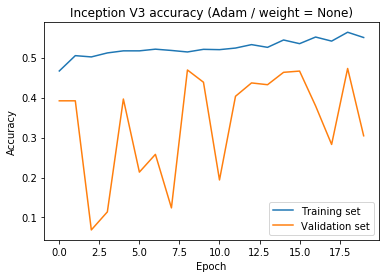

In [13]:
plt.plot(range(20), history3_1.history['acc'])
plt.plot(range(20), history3_1.history['val_acc'])
plt.title("Inception V3 accuracy (Adam / weight = None)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training set", "Validation set"])

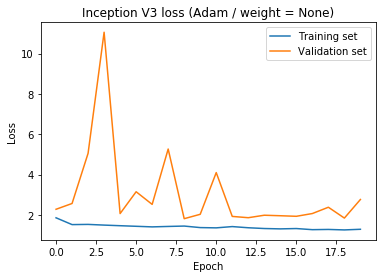

In [14]:
plt.plot(range(20), history3_1.history['loss'])
plt.plot(range(20), history3_1.history['val_loss'])
plt.title("Inception V3 loss (Adam / weight = None)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training set", "Validation set"])